In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_text
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
# Loading the dataset
dataset = pd.read_csv('Heart Attack.csv')

In [3]:
# Inspecting dataset

In [4]:
dataset.shape

(1319, 9)

In [5]:
# Lets view the first five rows of the dataset
dataset.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
# Lets see the data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [7]:
# Lets see the data description
dataset.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [8]:
#Lets check for misssing values
dataset.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [9]:
# Lets check for duplicates
dataset.duplicated().any()

False

In [10]:
# No missing values, No duplicates. The dtype of the class column needs to be changed from object to integers for classification

In [11]:
dataset

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Exploratory Data Analysis (EDA)

positive    810
negative    509
Name: class, dtype: int64


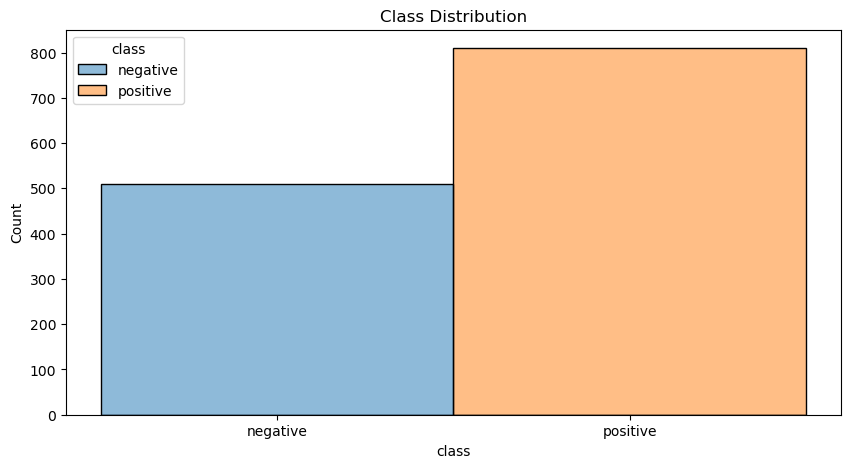

In [12]:
# df = pd.DataFrame(dataset)

# Use value_counts to count occurrences of each category
class_counts = dataset['class'].value_counts()

print(class_counts)

# The heart attack class 
plt.figure(figsize=(10,5))
sns.histplot(x="class",hue="class", data=dataset)
plt.title("Class Distribution")
plt.show()

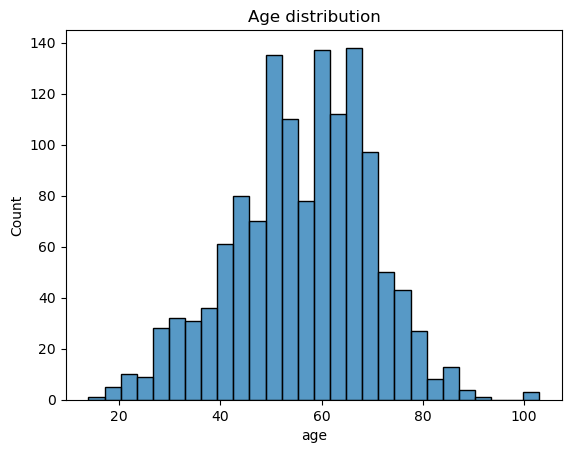

In [13]:
# Age column
# The count based on the age distribution
sns.histplot(dataset.age)
plt.title('Age distribution')
plt.show()

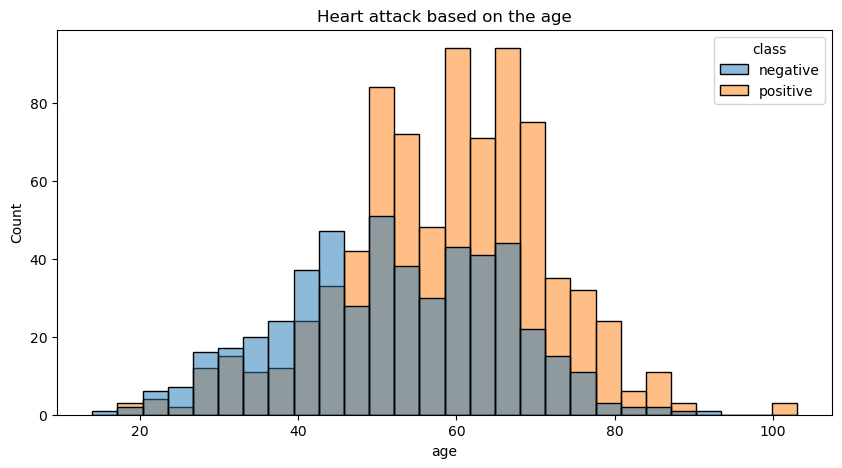

In [14]:
# The heart attack class count based on the age
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the age")
sns.histplot(x="age", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

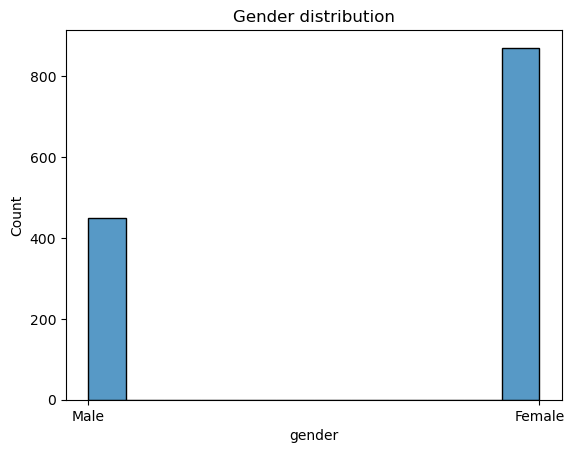

In [15]:
# Gender
# Integer 0 represents male, 1 represents female
# The count based on the gender distribution
sns.histplot(dataset.gender)
plt.xticks([0, 1], labels=np.array(['Male', 'Female']))
plt.title('Gender distribution')
plt.show

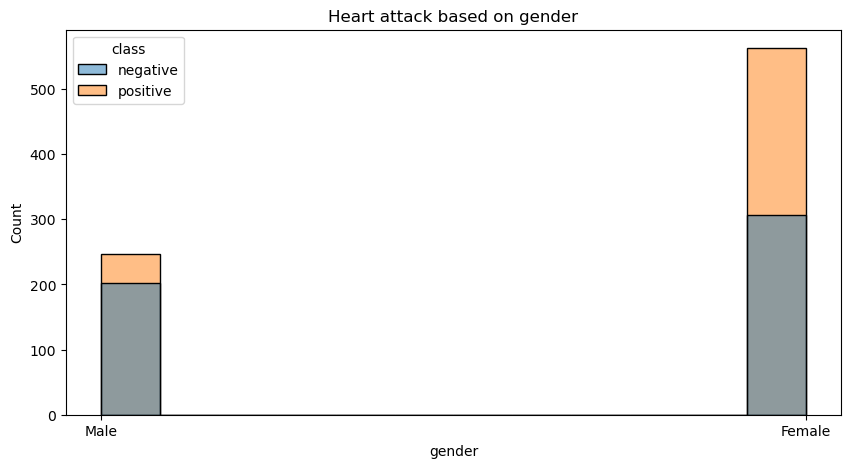

In [16]:
# The heart attack class count based on gender
plt.figure(figsize=(10,5))
plt.title("Heart attack based on gender")
plt.xticks([0, 1], labels=np.array(['Male', 'Female']))
sns.histplot(x="gender", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

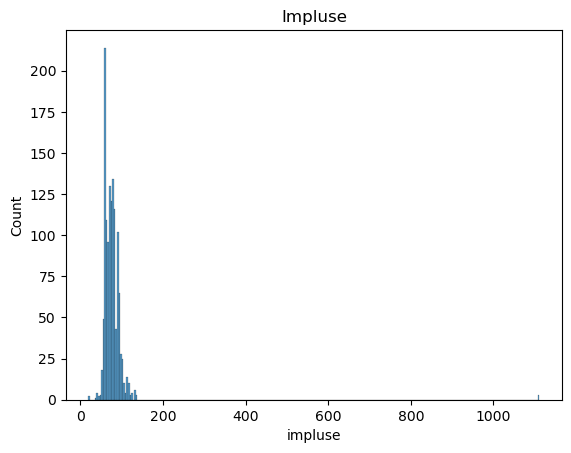

In [17]:
# Impluse column
# The count based on the impluse
sns.histplot(dataset.impluse)
plt.title('Impluse')
plt.show

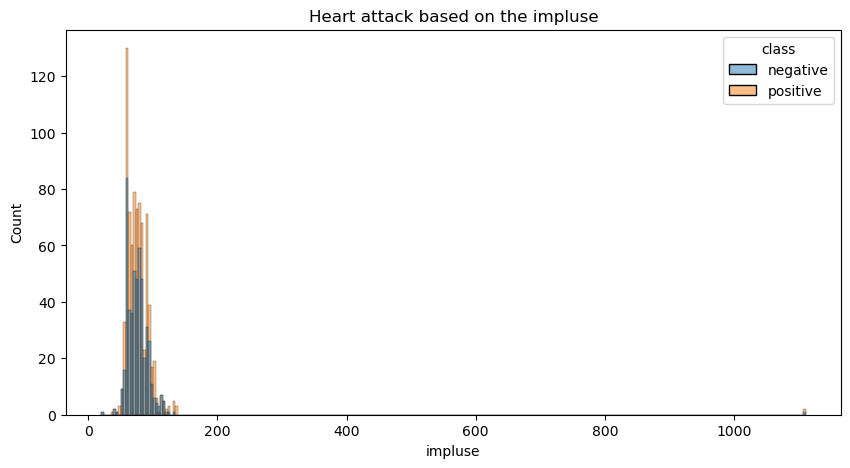

In [18]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the impluse")
sns.histplot(x="impluse", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

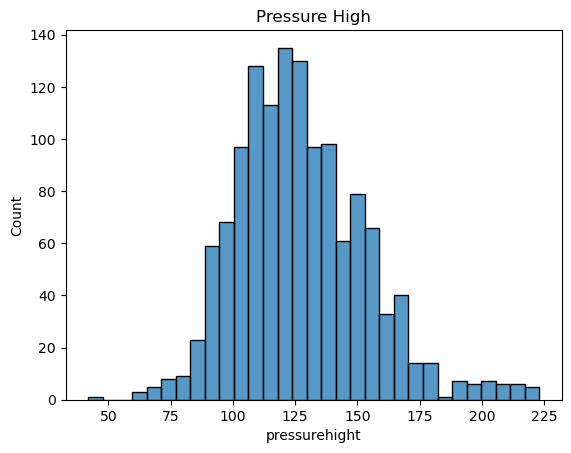

In [19]:
# Pressure High column
# The count based on the Pressurehigh
sns.histplot(dataset.pressurehight)
plt.title('Pressure High')
plt.show

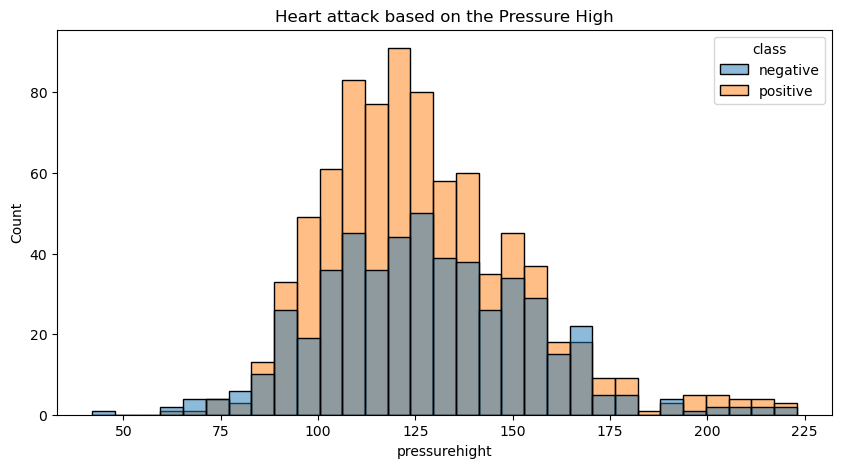

In [20]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the Pressure High")
sns.histplot(x="pressurehight", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

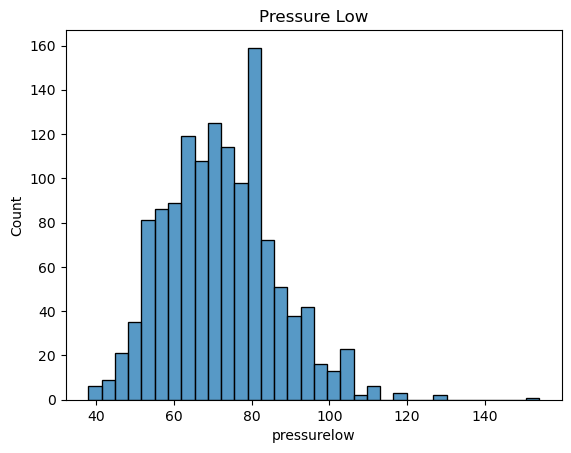

In [21]:
# Pressure low column
# The count based on the Pressurelow
sns.histplot(dataset.pressurelow)
plt.title('Pressure Low')
plt.show

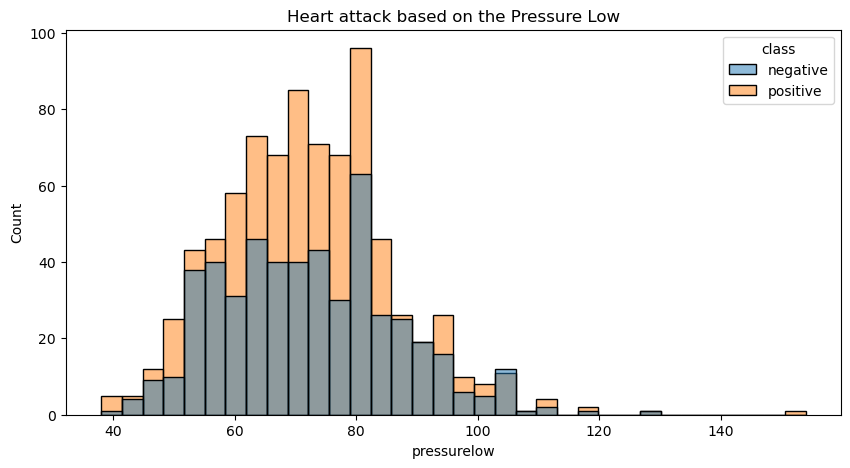

In [22]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the Pressure Low")
sns.histplot(x="pressurelow", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

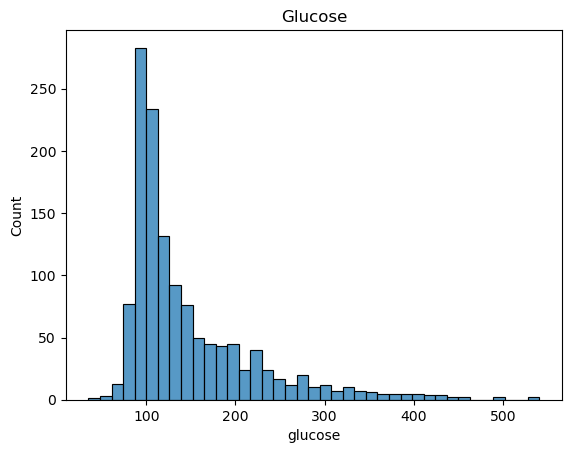

In [23]:
# Glucose column
# The count based on the Glucose level
sns.histplot(dataset.glucose)
plt.title('Glucose')
plt.show

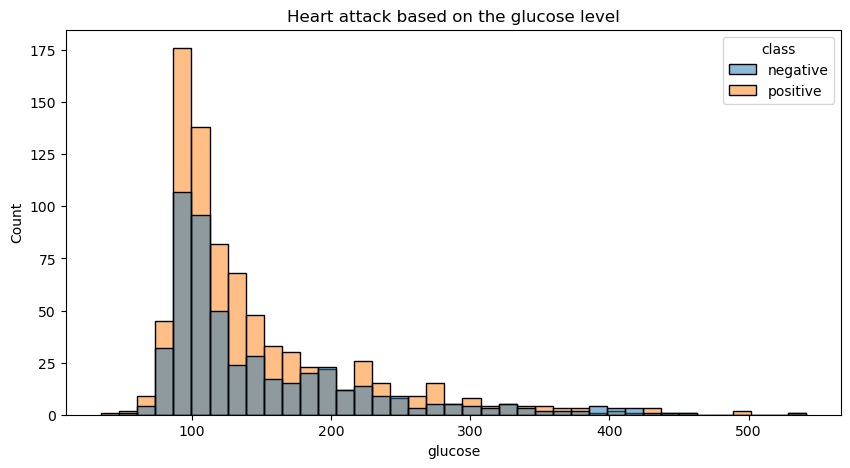

In [24]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the glucose level")
sns.histplot(x="glucose", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

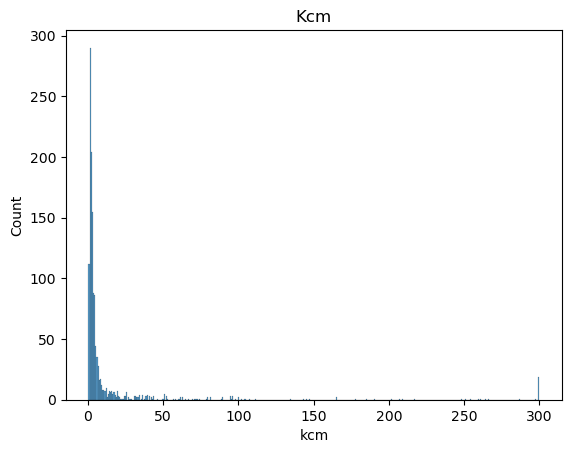

In [25]:
# Kcm column
# The count based on the kcm
sns.histplot(dataset.kcm)
plt.title('Kcm')
plt.show

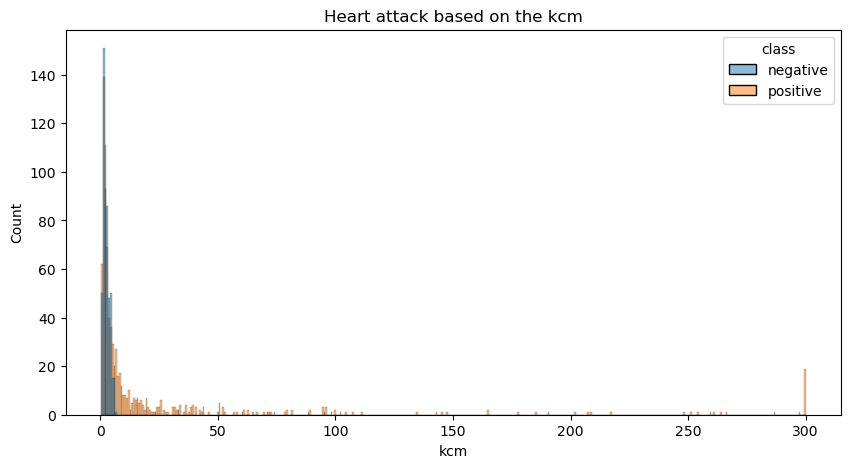

In [26]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the kcm")
sns.histplot(x="kcm", hue="class", data=dataset)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

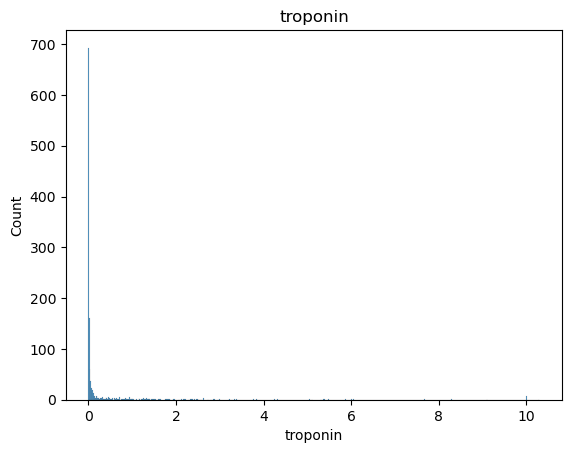

In [27]:
# Troponin column
# The count based on the troponin
sns.histplot(dataset.troponin)
plt.title('troponin')
plt.show

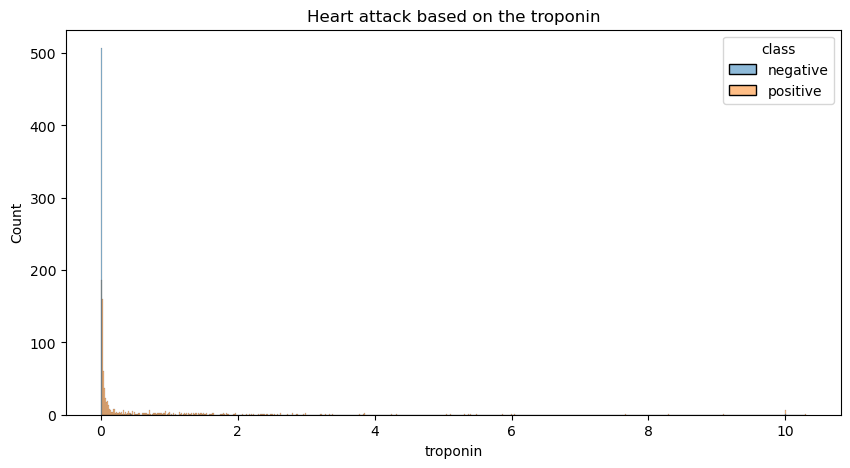

In [28]:
plt.figure(figsize=(10,5))
plt.title("Heart attack based on the troponin")
sns.histplot(x="troponin", hue="class", data=dataset)
plt.show()

                    age    gender   impluse  pressurehight  pressurelow  \
age            1.000000 -0.092874 -0.023440       0.017441     0.002614   
gender        -0.092874  1.000000 -0.026781       0.011065    -0.009370   
impluse       -0.023440 -0.026781  1.000000       0.010882     0.108353   
pressurehight  0.017441  0.011065  0.010882       1.000000     0.586166   
pressurelow    0.002614 -0.009370  0.108353       0.586166     1.000000   
glucose       -0.004193  0.006668 -0.019584       0.020807    -0.025614   
kcm            0.018419  0.017527 -0.013001      -0.016396    -0.023403   
troponin       0.088800  0.065793  0.011180       0.043729     0.043360   

                glucose       kcm  troponin  
age           -0.004193  0.018419  0.088800  
gender         0.006668  0.017527  0.065793  
impluse       -0.019584 -0.013001  0.011180  
pressurehight  0.020807 -0.016396  0.043729  
pressurelow   -0.025614 -0.023403  0.043360  
glucose        1.000000  0.045757  0.021069  
kc

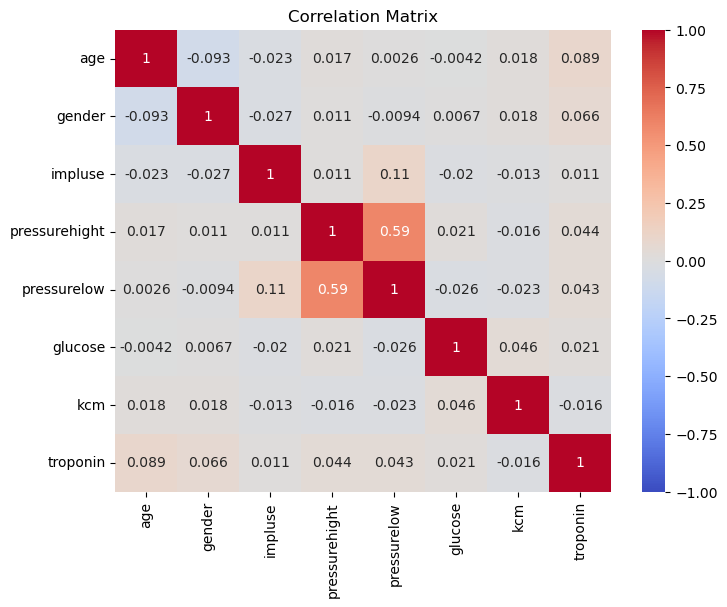

In [29]:
df = pd.DataFrame(dataset)

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Print or explore the correlation matrix
print(correlation_matrix)

# Lets show the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# SPLITTING AND SMOTING

In [30]:
# Data modelling
# In our dataset, Class has categorical value. We can use the below code to convert it to numerical value. It will replace Negative by 0 and Positive by 1 in the Class column
dataset['class']=dataset['class'].replace(['negative','positive'],[0,1])

In [31]:
# Assuming df is your DataFrame with features and labels
X = dataset.drop('class', axis=1)  # Features
y = dataset['class']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

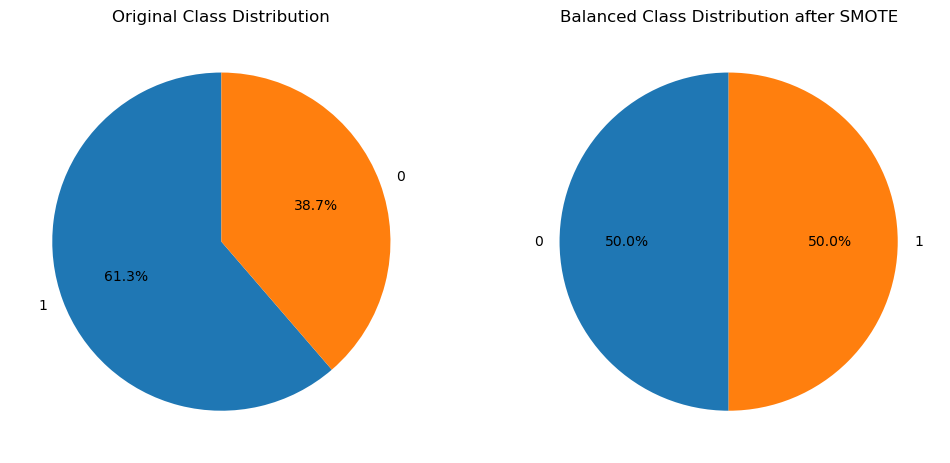

In [32]:
# Original class distribution in training set
original_counts = y_train.value_counts()

# Balanced class distribution after SMOTE
resampled_counts = pd.Series(y_resampled).value_counts()

# Plotting pie chart for the original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(original_counts, labels=original_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Original Class Distribution')

# Plotting pie chart for the balanced class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.pie(resampled_counts, labels=resampled_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Balanced Class Distribution after SMOTE')

plt.show()

In [33]:
print("Original class distribution in training set:")
print(y_train.value_counts())

print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Original class distribution in training set:
1    647
0    408
Name: class, dtype: int64

Balanced class distribution after SMOTE:
0    647
1    647
Name: class, dtype: int64


In [34]:
# Display the shape of the X_train set
print("Shape of X_train set:", X_train.shape)

# Display the shape of the y_train set
print("Shape of y_train set:", y_train.shape)

# Display a separator line
print("_" * 50)

# Display the shape of the X_test set
print("Shape of X_test set:", X_test.shape)

# Display the shape of the y_test set
print("Shape of y_test set:", y_test.shape)

Shape of X_train set: (1055, 8)
Shape of y_train set: (1055,)
__________________________________________________
Shape of X_test set: (264, 8)
Shape of y_test set: (264,)


# CLASSIFICATION

Accuracy: 0.6439393939393939
Confusion Matrix:
[[ 56  45]
 [ 49 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       101
           1       0.72      0.70      0.71       163

    accuracy                           0.64       264
   macro avg       0.63      0.63      0.63       264
weighted avg       0.65      0.64      0.65       264



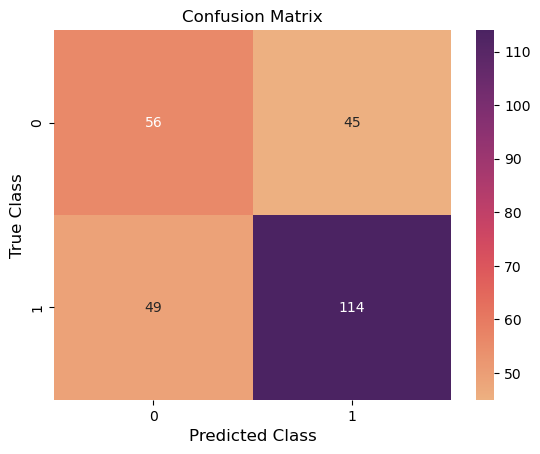

In [35]:
# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
knn_score = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_score)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
ax = sns.heatmap(confusion_mat, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

0.9772727272727273
Confusion Matrix:
[[ 98   3]
 [  3 160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



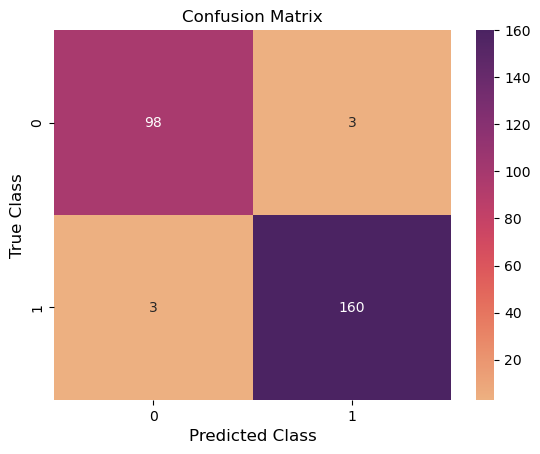

In [36]:
# Create a Decision Tree Classifier
DTs = DecisionTreeClassifier()

# Fit the model to the training data
DTs.fit(X_train, y_train)

y_pred = DTs.predict(X_test)

# Calculate and print the accuracy
DTs_score = accuracy_score(y_test, y_pred)
print(DTs_score)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

ax = sns.heatmap(confusion_mat, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [37]:
boost = GradientBoostingClassifier(random_state=0)

In [38]:
boost.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [39]:
y_pred_B = boost.predict(X_test)

In [40]:
y_pred_B

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [41]:
acc_B = metrics.accuracy_score(y_test, y_pred_B)
acc_B

0.9772727272727273

# CHECK FOR OVERFITTING

In [42]:

# Make predictions on the training set
y_train_pred=boost.predict(X_train)

# Make predictions on the test set
y_test_pred = boost.predict(X_test)

# Calculate the accuracy on the training set
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9772727272727273


# EVALUATION

In [43]:
# Initialize classifiers
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier()

In [44]:
classifiers=[dt_classifier,knn_classifier]
classifier_names=['Decision Tree','K-Nearest Neighbors']

In [45]:
# List to store evaluation metrics
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

In [46]:
# Evaluate each classifier and collect performance metrics
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

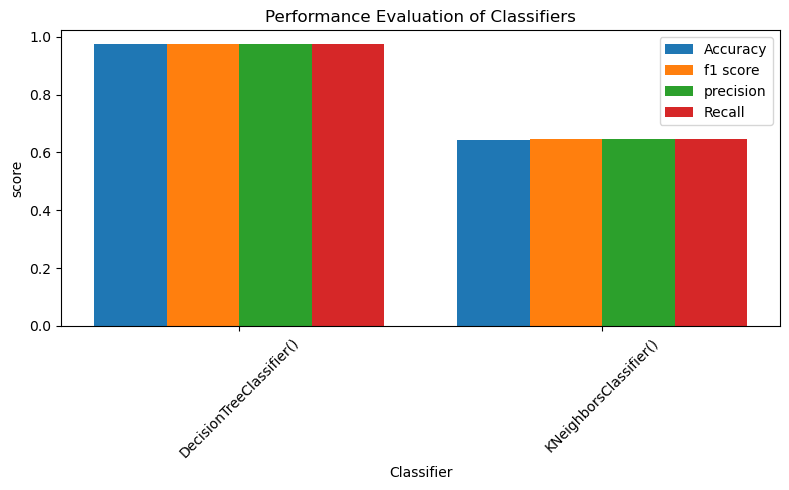

In [47]:
x = np.arange(len(classifiers))
width=0.2
plt.figure(figsize=(8,5))
plt.bar(x,accuracy_scores,width,label='Accuracy')
plt.bar(x+width,f1_scores,width,label='f1 score')
plt.bar(x+(2*width),precision_scores,width,label='precision')
plt.bar(x+(3*width),precision_scores,width,label='Recall')

plt.xlabel('Classifier')
plt.ylabel('score')
plt.title('Performance Evaluation of Classifiers')
plt.xticks(x+width*1.5,classifiers,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()